In [54]:
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import math

# Connect to the database
conn = sqlite3.connect('data.db')
cursor = conn.cursor()

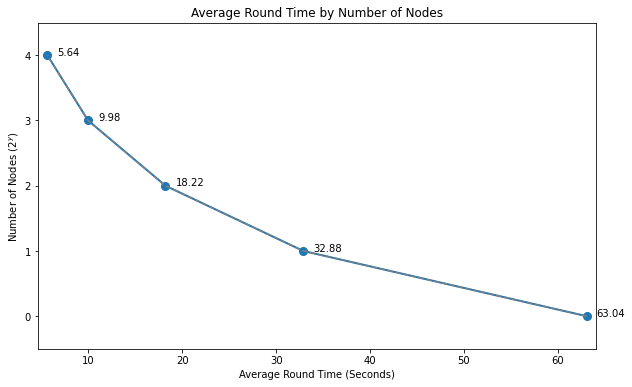

In [69]:
# Query the database to get the average round times for each distinct num_nodes value
cursor.execute("""
    SELECT num_nodes, AVG(round_time)
    FROM round_times
    GROUP BY num_nodes
""")

# Fetch the results and store them in a list of tuples
results = cursor.fetchall()

# Extract the x and y values from the results
x = [result[1] for result in results]
y = [result[0] for result in results]

# Calculate the log base 2 of the y values
log_y = [math.log2(y_value) for y_value in y]

# Create a line graph of the average round times for each distinct num_nodes value
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, log_y, '-o', linewidth=2, markersize=8)

# Smooth the line using a cubic spline interpolation
y_smooth = np.linspace(min(log_y), max(log_y), 200)
x_smooth = np.interp(y_smooth, log_y, x)
plt.plot(x_smooth, y_smooth, '--', color='gray')

# Label each data point
for i, txt in enumerate(x):
    plt.annotate(f'{x[i]:.2f}', (x[i], log_y[i]), textcoords="offset points", xytext=(10,0), ha='left')

plt.xlabel('Average Round Time (Seconds)')
plt.ylabel('Number of Nodes ($2^y$)')
plt.title('Average Round Time by Number of Nodes')

# Set the y-axis limits to 0 and the maximum log_y value, with some padding
plt.ylim(-.5, max(log_y) + 0.5)
# Set the x-axis limits to 0 and the maximum x value, with some padding
plt.xlim(min(x) - 1, max(x) + 1)

# Show the graph
plt.show()


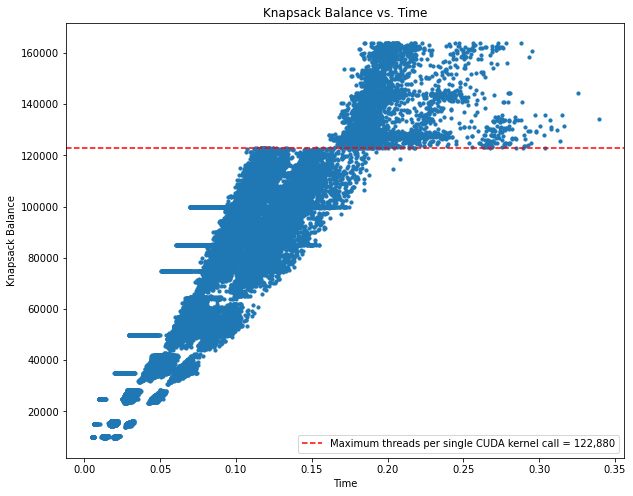

In [73]:
# Query the database to get the data
cursor.execute("""
    SELECT knapsack_balance, time
    FROM knapsack_times
""")

# Fetch the results and store them in a list of tuples
results = cursor.fetchall()

# Store the data in separate lists
knapsack_balance = []
time = []
for result in results:
    knapsack_balance.append(result[0])
    time.append(result[1])

# Create a scatter plot of knapsack_balance vs. time
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(time, knapsack_balance, s=10)

# Add a red line at y = 120*1024, labeled as "maximum threads per single kernel call"
ax.axhline(y=120*1024, color='red', linestyle='--', label='Maximum threads per single CUDA kernel call = 122,880')

ax.set_xlabel('Time')
ax.set_ylabel('Knapsack Balance')
ax.set_title('Knapsack Balance vs. Time')

# Create a legend for the plot
ax.legend()

plt.show()


In [107]:
# Query the database to get the data
cursor.execute("""
SELECT DISTINCT
     DT.investor_strategy AS 'strategy'
    ,DT.investor_aggressiveness AS 'aggressiveness'
    ,COALESCE(T2.wins, 0) AS 'wins'
FROM
investor_status AS DT
LEFT JOIN
(
    SELECT         
         T.investor_strategy AS 'strategy'
        ,T.investor_aggressiveness AS 'aggressiveness'
        ,COUNT(*) AS 'wins'
    FROM 
    (
        SELECT 
            num_nodes
            ,investor_market
            ,MAX(investor_balance)
            ,investor_strategy 
            ,investor_aggressiveness
        FROM 
            investor_status 
        GROUP BY investor_market, num_nodes
    ) AS T
    GROUP BY T.investor_strategy, T.investor_aggressiveness
) AS T2
ON DT.investor_strategy = T2.strategy AND DT.investor_aggressiveness = T2.aggressiveness
ORDER BY wins DESC
""")
               

               
results = cursor.fetchall()
print(results)

#for each market
#find the highest (investor, strategy) combo that has hte highest balance in each market


# for each market, 
# find the combo of (investor, strategy) find the count() of 
# the times where it has the highest balance in the market, 
# return the combo that has the highest balance the most number of times


# #workers tables
# cursor.execute(
#     """
#     CREATE TABLE IF NOT EXISTS investor_status(
#          num_nodes                  INTEGER
#          ,node_id                   INTEGER
#          ,round_num                 INTEGER
#          ,investor_id               INTEGER
#          ,investor_strategy         INTEGER
#          ,investor_aggressiveness   INTEGER
#          ,investor_market           INTEGER
#          ,investor_balance          INTEGER
#     )"""
# )

[(0, 6, 110), (0, 5, 108), (0, 7, 107), (0, 4, 100), (4, 4, 19), (4, 7, 18), (4, 5, 16), (4, 6, 15), (5, 4, 5), (3, 4, 1), (5, 5, 1), (0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 3, 0), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 3, 0), (1, 4, 0), (1, 5, 0), (1, 6, 0), (1, 7, 0), (2, 0, 0), (2, 1, 0), (2, 2, 0), (2, 3, 0), (2, 4, 0), (2, 5, 0), (2, 6, 0), (2, 7, 0), (3, 0, 0), (3, 1, 0), (3, 2, 0), (3, 3, 0), (3, 5, 0), (3, 6, 0), (3, 7, 0), (4, 0, 0), (4, 1, 0), (4, 2, 0), (4, 3, 0), (5, 0, 0), (5, 1, 0), (5, 2, 0), (5, 3, 0), (5, 6, 0), (5, 7, 0)]
